* **CUST_ID**: Identification of Credit Card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases
* **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
* **CASH_ADVANCE**: Cash in advance given by the user
* **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid
* **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX**: Number of purchase transactions made
* **CREDIT_LIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
* **PRC_FULL_PAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user

In [61]:
import pandas as pd

In [62]:
input_file = 'data.csv'
output_file = 'output.csv'

data = pd.read_csv(input_file) 
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

2. Kiekvienam **tolydinio** tipo atributui paskaičiuoti:
* bendrą reikšmių skaičių,
* trūkstamų reikšmių procentą,
* kardinalumą (**kardinalumas** matematikoje yra aibės savybė, apibendrinanti baigtinės aibės narių kiekio sąvoką. Papraščiau tariant kiek yra skirtingų atributo reikšmių. Pavyzdžiui lyties atributo kardinalumas lygus 2 - t.y., lytis gali turėti tik dvi reikšmes),
* minimalią (_min_) ir maksimalią (_max_) reikšmes,
* 1-ąją ir 3-iąją kvartilius (žr. 2 paskaitą, 37 skaidrę),
* vidurkį (žr. 2 paskaitą, 36 skaidrę),
* medianą (žr. 2 paskaitą, 36 skaidrę),
* standartinį nuokrypį (žr. 2 paskaitą, 36 skaidrę).

In [64]:
continious_types = {
    'BALANCE': 'Balansas',
    'BALANCE_FREQUENCY': 'Balanso dažnumas',
    'PURCHASES': 'Pirkimai',
    'ONEOFF_PURCHASES': 'Vienkartiniai pirkimai',
    'INSTALLMENTS_PURCHASES': 'Įmokos pirkimai',
    'CASH_ADVANCE': 'Grynaisiais avansas',
    'PURCHASES_FREQUENCY': 'Pirkimų dažnumas',
    'ONEOFF_PURCHASES_FREQUENCY': 'Vienkartinių pirkimų dažnumas',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'Įmokų pirkimų dažnumas',
    'CASH_ADVANCE_FREQUENCY': 'Grynaisiais avanso dažnumas',
    'CASH_ADVANCE_TRX': 'Grynaisiais avanso operacijos',
    'PURCHASES_TRX': 'Pirkimų operacijos',
    'CREDIT_LIMIT': 'Kreditinė riba',
    'PAYMENTS': 'Mokėjimai',
    'MINIMUM_PAYMENTS': 'Minimalūs mokėjimai',
    'PRC_FULL_PAYMENT': 'Pilnas mokėjimas',
    'TENURE': 'Laikotarpis'
}

rows = []

for type_name, type_translation in continious_types.items():
    count = data[type_name].count()
    empty_percentage = (1 - count / len(data[type_name])) * 100
    unique_values = len(data[type_name].unique())
    min_value = data[type_name].min()
    max_value = data[type_name].max()
    quartile_1 = data[type_name].quantile(0.25)
    quartile_3 = data[type_name].quantile(0.75)
    average = data[type_name].mean()
    median = data[type_name].median()
    std_dev = data[type_name].std()

    df = pd.DataFrame({
        'Atributo pavadinimas': [type_translation],
        'Kiekis (Eilučių sk.)': [count],
        'Trūkstamos reikšmės (%)': [empty_percentage],
        'Kardinalumas': [unique_values],
        'Minimali reikšmė': [min_value],
        'Maksimali reikšmė': [max_value],
        '1-asis kvartilis': [quartile_1],
        '3-asis kvartilis': [quartile_3],
        'Vidurkis': [average],
        'Mediana': [median],
        'Standartinis nuokrypis': [std_dev]
    })

    rows.append(df)

continious_types_table = pd.concat(rows, ignore_index=True)

continious_types_table.to_csv(output_file, index=False)

continious_types_table
    

,Atributo pavadinimas,Kiekis (Eilučių sk.),Trūkstamos reikšmės (%),Kardinalumas,Minimali reikšmė,Maksimali reikšmė,1-asis kvartilis,3-asis kvartilis,Vidurkis,Mediana,Standartinis nuokrypis
0,Balansas,8950,0.000000,8871,0.000000,19043.13856,128.281915,2054.140036,1564.474828,873.385231,2081.531879
1,Balanso dažnumas,8950,0.000000,43,0.000000,1.00000,0.888889,1.000000,0.877271,1.000000,0.236904
2,Pirkimai,8950,0.000000,6203,0.000000,49039.57000,39.635000,1110.130000,1003.204834,361.280000,2136.634782
3,Vienkartiniai pirkimai,8950,0.000000,4014,0.000000,40761.25000,0.000000,577.405000,592.437371,38.000000,1659.887917
4,Įmokos pirkimai,8950,0.000000,4452,0.000000,22500.00000,0.000000,468.637500,411.067645,89.000000,904.338115
5,Grynaisiais avansas,8950,0.000000,4323,0.000000,47137.21176,0.000000,1113.821139,978.871112,0.000000,2097.163877
6,Pirkimų dažnumas,8950,0.000000,47,0.000000,1.00000,0.083333,0.916667,0.490351,0.500000,0.401371
7,Vienkartinių pirkimų dažnumas,8950,0.000000,47,0.000000,1.00000,0.000000,0.300000,0.202458,0.083333,0.298336
8,Įmokų pirkimų dažnumas,8950,0.000000,47,0.000000,1.00000,0.000000,0.750000,0.364437,0.166667,0.397448
9,Grynaisiais avanso dažnumas,8950,0.000000,54,0.000000,1.50000,0.000000,0.222222,0.135144,0.000000,0.200121


3. Kiekvienam **kategorinio** tipo atributui paskaičiuoti:
* bendrą reikšmių skaičių,
* trūkstamų reikšmių procentą,
* kardinalumą,
* modą (**moda** - vadinama dažniausiai pasitaikanti imties reikšmė) (žr. 2 paskaitą, 39 skaidrę),
* modos dažnumo reikšmę (žr. 2 paskaitą, 39 skaidrę).
* modos procentinę reikšmę (žr. 2 pasaitą, 39 skaidrę),
* 2-ąją modą (žr. 2 paskaita, 39 skaidrę),
* 2-osios modos dažnumo reikšmę (žr. 2 paskaitą, 39 skaidrę),
* 2-osios modos procentinę reikšmę (žr. 2 pasaitą, 39 skaidrę).

In [65]:
categorical_types = {
    'CUST_ID': 'Kliento ID'
}

rows = []

for type_name, type_translation in categorical_types.items():
    count = data[type_name].count() # Bendras reikšmių skaičius
    empty_percentage = (1 - count / len(data[type_name])) * 100 # Trūkstamos reikšmės procentais
    unique_values = len(data[type_name].unique()) # Kardinalumas
    mode = data[type_name].mode().values[0] # Moda
    mode_frequency = data[type_name].value_counts().max() # Modos dažnumas
    mode_percentage = (mode_frequency / count) * 100 # Modos dažnumas procentais
    second_mode = data[type_name].value_counts().index[1] # Antra modos reikšmė
    second_mode_frequency = data[type_name].value_counts().iloc[1] # Antros modos dažnumas
    second_mode_percentage = (second_mode_frequency / count) * 100 # Antros modos dažnumas procentais

    df = pd.DataFrame({
        'Atributo pavadinimas': [type_translation],
        'Kiekis (Eilučių sk.)': [count],
        'Trūkstamos reikšmės (%)': [empty_percentage],
        'Kardinalumas': [unique_values],
        'Moda': [mode],
        'Modos dažnumas': [mode_frequency],
        'Moda, %' : [mode_percentage],
        '2-oji moda': [second_mode],
        '2-osios Modos dažnumas': [second_mode_frequency],
        '2-oji Moda, %' : [second_mode_percentage]
    })

    rows.append(df)

categorical_types_table = pd.concat(rows, ignore_index=True)

categorical_types_table.to_csv(output_file, index=False)

categorical_types_table
    

,Atributo pavadinimas,Kiekis (Eilučių sk.),Trūkstamos reikšmės (%),Kardinalumas,Moda,Modos dažnumas,"Moda, %",2-oji moda,2-osios Modos dažnumas,"2-oji Moda, %"
0,Kliento ID,8950,0.0,8950,C10001,1,0.011173,C16135,1,0.011173


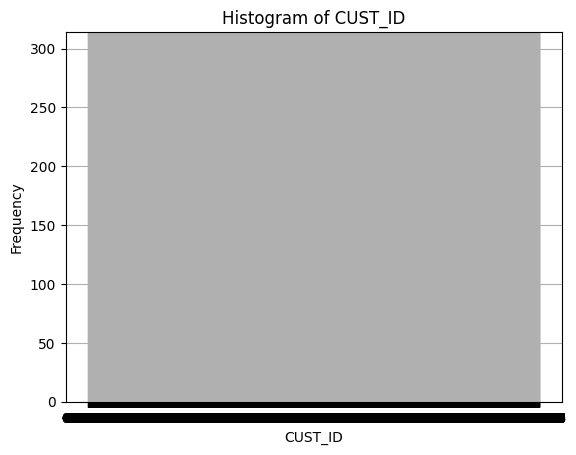

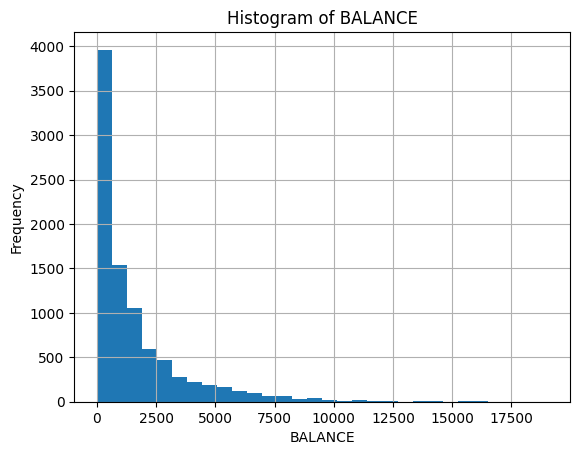

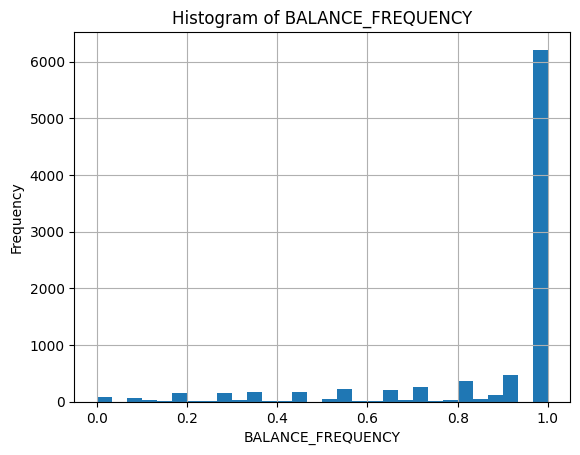

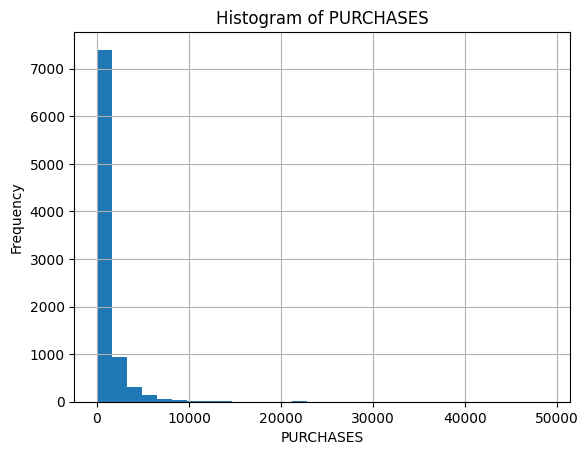

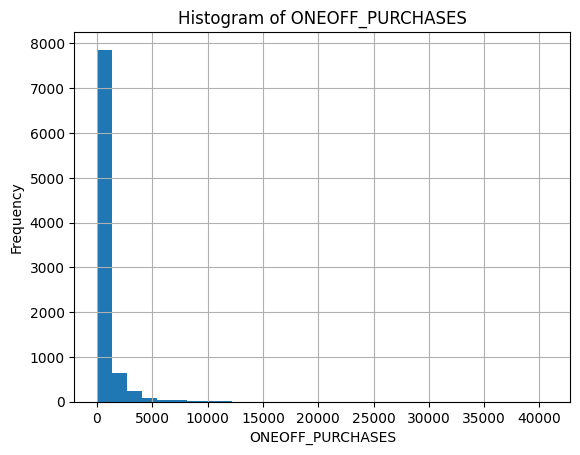

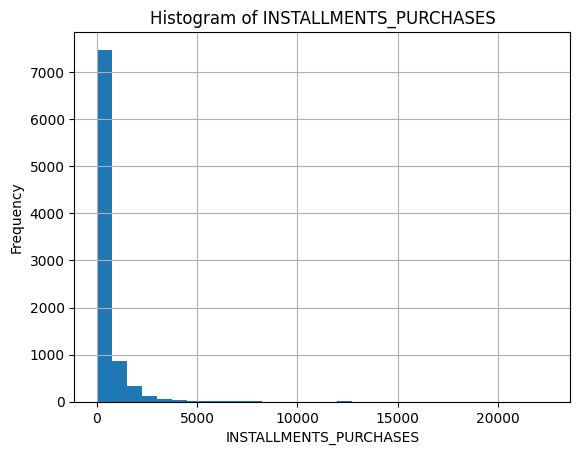

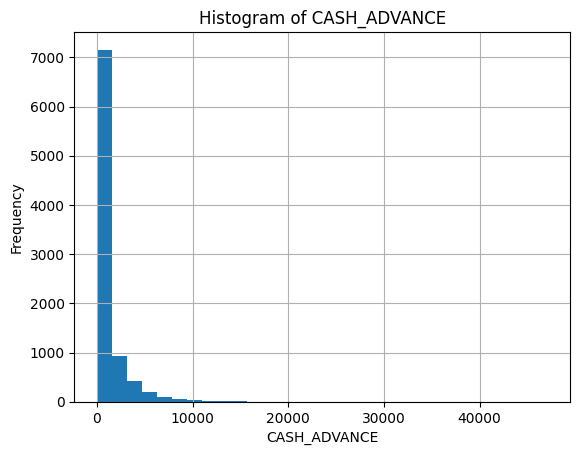

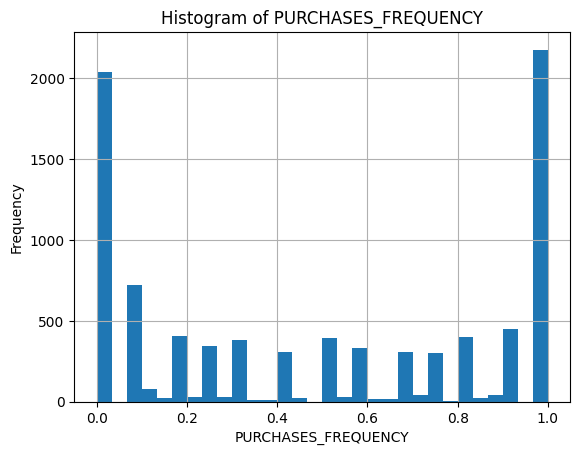

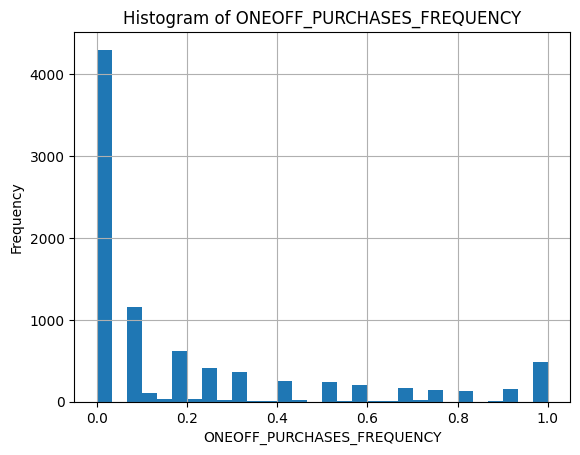

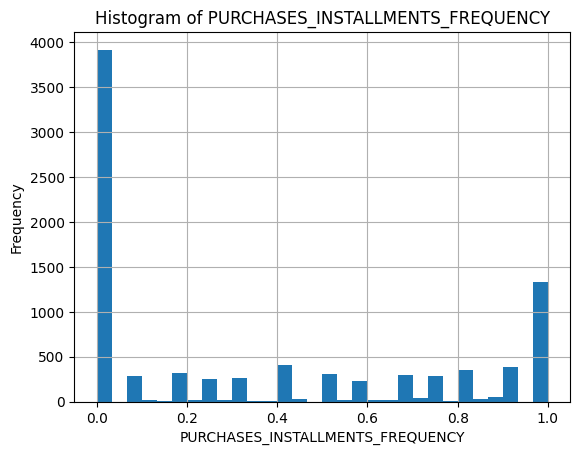

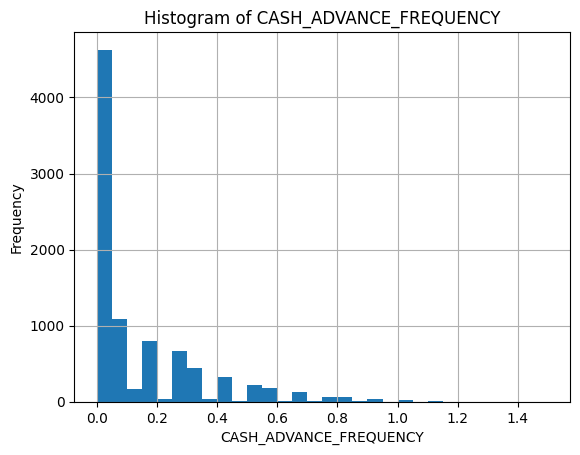

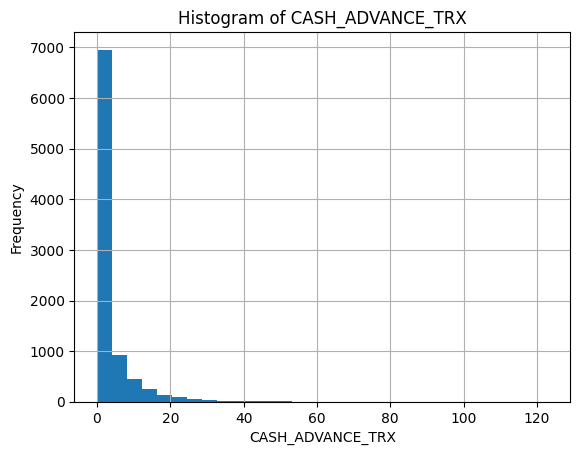

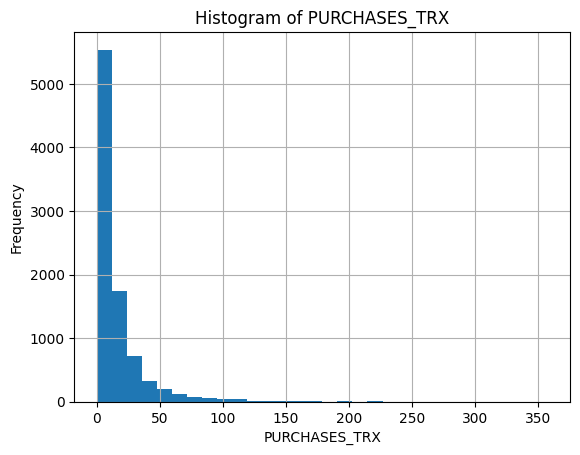

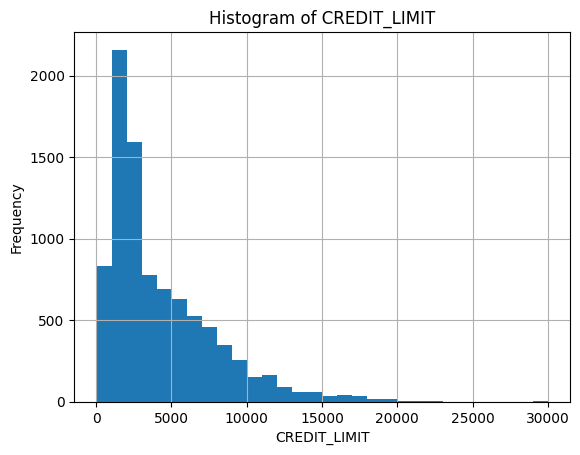

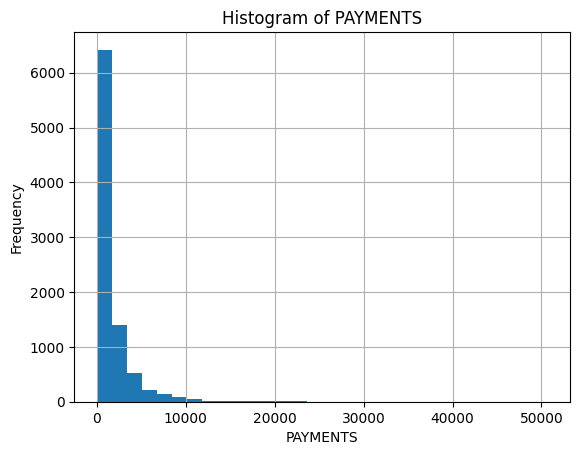

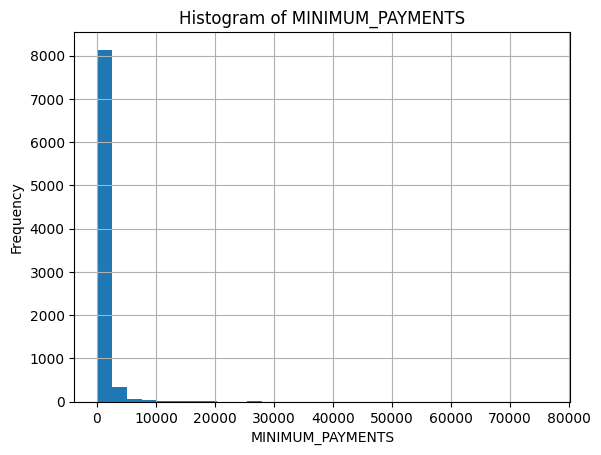

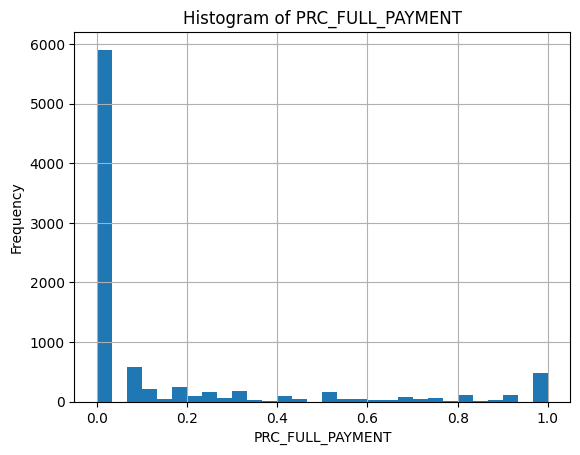

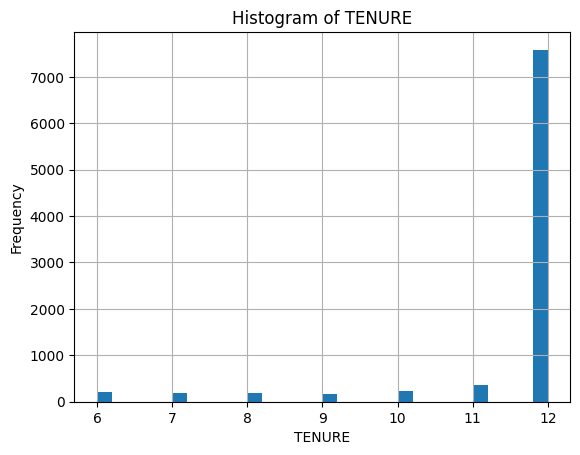

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the recommended number of bins
n = len(data)
num_bins = int(1 + 3.22 * np.log(n))

# Draw histograms for each attribute
for column in data.columns:
    plt.figure()
    data[column].hist(bins=num_bins)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
